***
**Exercise 1**  
*Make a histogram from a 2d random distribution*

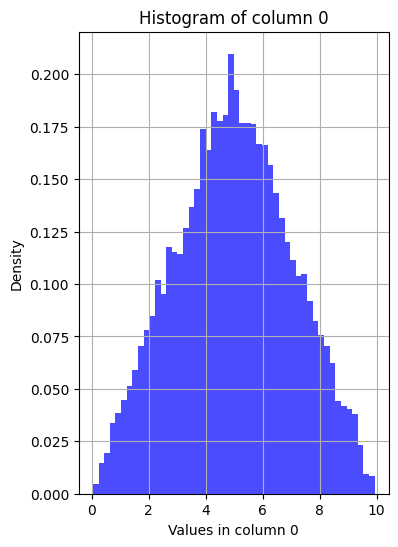

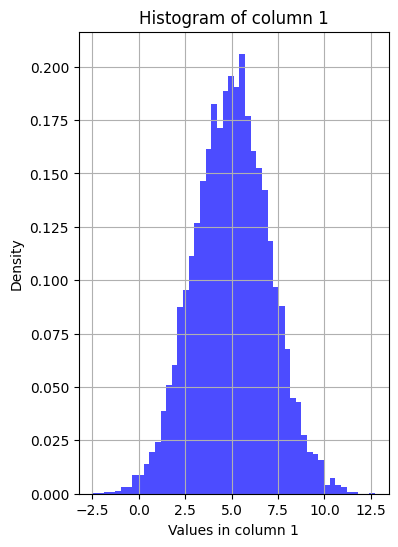

In [1]:
from data_aquisition import DataAquisition as aq

size = 10000

random_2d = aq.generate_2d_dist(size=size)


aq_instance = aq(random_2d)

aq_instance.plot_histograms()



**Exercise 2**  
*Make a 2d heat map from a 2d random distribution*

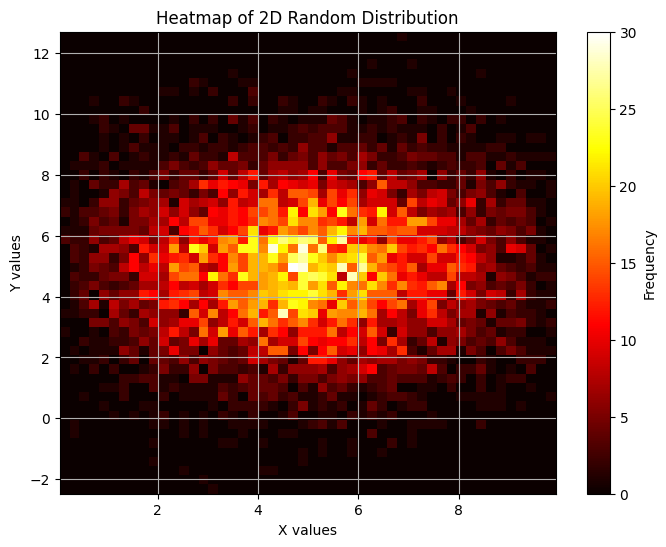

In [2]:
aq_instance.plot_heatmap() #Same distribution as above

**Exercise 3**  
*Make a histogram for the source data you selected*  
  

In [3]:
basics_filepath = aq.check_path("../data/title.basics.tsv")
ratings_filepath = aq.check_path("../data/title.ratings.tsv")
print(aq.read_file_tsv(basics_filepath))
print(aq.read_file_tsv(ratings_filepath))

FileNotFoundError: File not found: ../data/title.basics.tsv

These are very large datasets, so I will only import the ratings, and some of the basics columns in this exercise.

In [4]:
#Dataset too large to import
df_basics = aq.read_file_tsv(basics_filepath, columns=['tconst','startYear'], nrows=None)

In [5]:
df_ratings = aq.read_file_tsv(ratings_filepath, columns=None, nrows=None)

Compile them into one dataset, with the same index. Also remove the ones that have under 200 number of votes, as they don't bring as much value. 

In [6]:
def compile_and_filter(basics_df, ratings_df, min_votes=200):

    # Merge on 'tconst'
    merged_df = basics_df.merge(ratings_df, on='tconst')
    # Filter rows with numVotes >= min_votes
    filtered_df = merged_df[merged_df['numVotes'] >= min_votes]
    return filtered_df

compiled_df = compile_and_filter(df_basics, df_ratings)

print(compiled_df['startYear'].dtype)
print(compiled_df['numVotes'].dtype)
print(compiled_df['averageRating'].dtype)


object
int64
float64


I want to change the years to integers, so that the histograms are clean.

In [7]:
import pandas as pd
compiled_df['startYear'] = pd.to_numeric(compiled_df['startYear'], errors='coerce') # Convert to numeric, setting errors to NaN

compiled_df = compiled_df.rename(columns={
    'tconst': 'Title ID',
    'startYear': 'Release year',
    'averageRating': 'Rating',
    'numVotes': 'Number of votes'
})

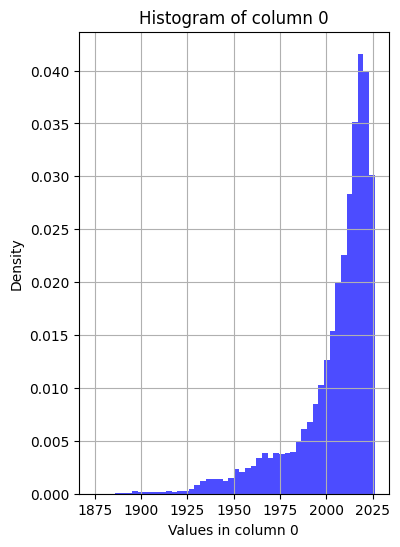

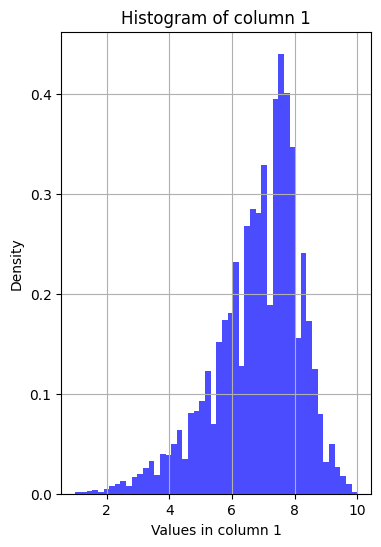

In [8]:
aq_instance2 = aq(compiled_df[['Release year', 'Rating']].to_numpy())
aq_instance2.plot_histograms()


**Exercise 4**  
*Convert the histogram into a discrete PMF*

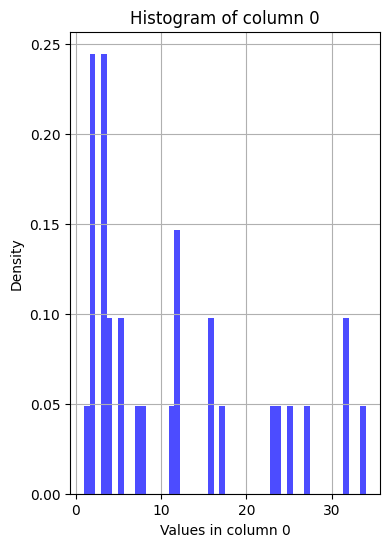

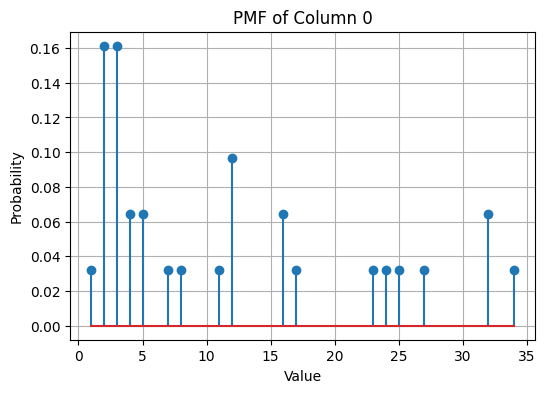

In [9]:
random_filepath = aq.check_path("../data/random_data.csv")
random_data_df = pd.read_csv(random_filepath) # Reading data from a random file to check if the code works.
aq_test = aq(random_data_df.values)
aq_test.plot_histograms()
aq_test.plot_all_pmfs()


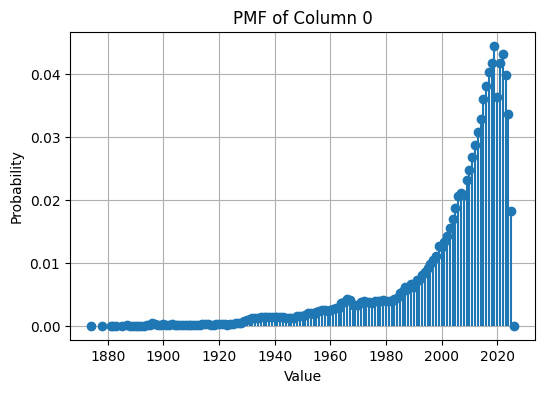

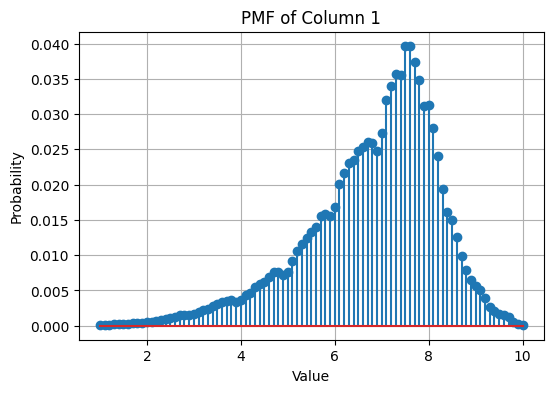

In [10]:
aq_instance2.plot_all_pmfs()

**Exercise 5**  
*Calculate the cumulative for each feature*

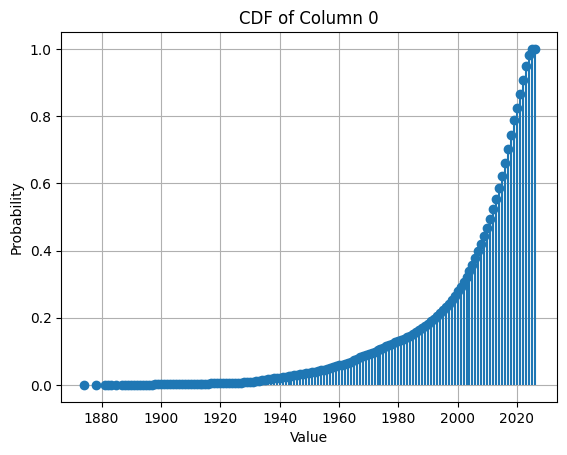

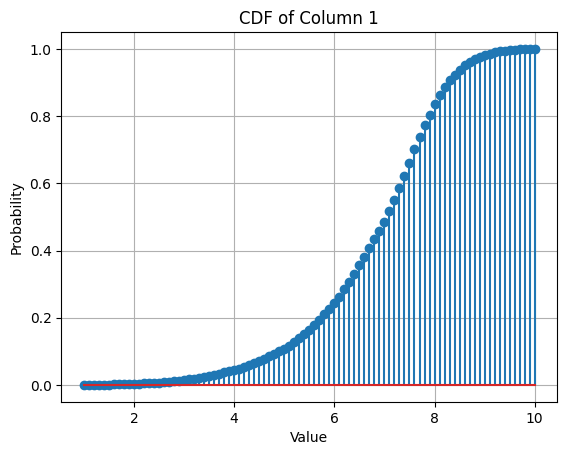

In [14]:
aq_instance2.plot_all_cdfs()